# NYC Flight Data - Exploratory Data Analysis
        By Anupam Ranjan

In [1]:
import os
os.chdir('E:/Anupam/HomeDocs/DataScience/UpX-Academy/DataAnalyticsWithPython/Project/Project_1_NYC-Flight_Data/')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from datetime import date, datetime, timedelta, time

Read the NYC Flight Data File

In [3]:
Flight_Data = pd.read_csv('dataset/flight_data.csv')
Flight_Data['flight_no'] = Flight_Data['carrier'] + Flight_Data['flight'].astype(str)
Flight_Data.drop('flight', axis =1, inplace = True)
display(Flight_Data.head())

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,flight_no
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,UA1545
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,UA1714
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,AA1141
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,B6725
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00,DL461


#### Fill NaN Values
1. dep_delay, arr_delay, air_time - The NaN values are filled with mean of origin and destination
2. sched_dep_time, sched_arr_time - There were no missing values. We simply, make thesecolumn DateTime data type and extract time part of it 


In [4]:
# Fill NaN values
Flight_Data["dep_delay"].fillna(Flight_Data.groupby(["origin", 'dest'])["dep_delay"].transform("mean"), inplace=True)
Flight_Data["arr_delay"].fillna(Flight_Data.groupby(["origin", 'dest'])["arr_delay"].transform("mean"), inplace=True)
Flight_Data["air_time"].fillna(Flight_Data.groupby(["origin", 'dest'])["air_time"].transform("mean"), inplace=True)
# There is 1 record which is still NaN. Lets fill that with mean of airlines
Flight_Data.dep_delay = Flight_Data.dep_delay.fillna(Flight_Data.groupby("carrier")["dep_delay"].transform("mean"))
Flight_Data.arr_delay = Flight_Data.arr_delay.fillna(Flight_Data.groupby("carrier")["arr_delay"].transform("mean"))
Flight_Data.air_time = Flight_Data.air_time.fillna(Flight_Data.groupby("carrier")["air_time"].transform("mean")).astype(int)

Flight_Data.dep_delay = Flight_Data.dep_delay.astype(int)
Flight_Data.arr_delay = Flight_Data.arr_delay.astype(int)

In [5]:
Flight_Data['scheduled_departure_time'] = Flight_Data.apply(lambda x: datetime(x.year, x.month,x.day, x.sched_dep_time // 100,\
                                                                              x.sched_dep_time % 100, 0), axis = 1)
Flight_Data['scheduled_arrival_time'] = Flight_Data.apply(lambda x: datetime(x.year, x.month,x.day, x.sched_arr_time // 100,\
                                                                              x.sched_arr_time % 100, 0), axis = 1)

Flight_Data['departure_time'] = Flight_Data.apply(lambda x: x.scheduled_departure_time + timedelta(minutes  = x.dep_delay), axis = 1)
Flight_Data['arrival_time'] = Flight_Data.apply(lambda x: x.scheduled_arrival_time + timedelta(minutes  = x.arr_delay), axis = 1)

Flight_Data.drop(['sched_dep_time', 'sched_arr_time', 'dep_time', 'arr_time'], axis = 1, inplace = True)
Flight_Data.head()

,year,month,day,dep_delay,arr_delay,carrier,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,flight_no,scheduled_departure_time,scheduled_arrival_time,departure_time,arrival_time
0,2013,1,1,2,11,UA,N14228,EWR,IAH,227,1400,5,15,01-01-2013 05:00,UA1545,2013-01-01 05:15:00,2013-01-01 08:19:00,2013-01-01 05:17:00,2013-01-01 08:30:00
1,2013,1,1,4,20,UA,N24211,LGA,IAH,227,1416,5,29,01-01-2013 05:00,UA1714,2013-01-01 05:29:00,2013-01-01 08:30:00,2013-01-01 05:33:00,2013-01-01 08:50:00
2,2013,1,1,2,33,AA,N619AA,JFK,MIA,160,1089,5,40,01-01-2013 05:00,AA1141,2013-01-01 05:40:00,2013-01-01 08:50:00,2013-01-01 05:42:00,2013-01-01 09:23:00
3,2013,1,1,-1,-18,B6,N804JB,JFK,BQN,183,1576,5,45,01-01-2013 05:00,B6725,2013-01-01 05:45:00,2013-01-01 10:22:00,2013-01-01 05:44:00,2013-01-01 10:04:00
4,2013,1,1,-6,-25,DL,N668DN,LGA,ATL,116,762,6,0,01-01-2013 06:00,DL461,2013-01-01 06:00:00,2013-01-01 08:37:00,2013-01-01 05:54:00,2013-01-01 08:12:00


In [6]:
Flight_Data.isnull().sum()

year                           0
month                          0
day                            0
dep_delay                      0
arr_delay                      0
carrier                        0
tailnum                     2512
origin                         0
dest                           0
air_time                       0
distance                       0
hour                           0
minute                         0
time_hour                      0
flight_no                      0
scheduled_departure_time       0
scheduled_arrival_time         0
departure_time                 0
arrival_time                   0
dtype: int64

In [7]:
display(round(Flight_Data.describe().T, 2))

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.00,0.00,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.55,3.41,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.71,8.77,1.0,8.0,16.0,23.0,31.0
dep_delay,336776.0,12.66,39.72,-43.0,-5.0,-1.0,12.0,1301.0
arr_delay,336776.0,6.94,44.02,-86.0,-16.0,-4.0,14.0,1272.0
air_time,336776.0,149.62,93.35,20.0,82.0,128.0,190.0,695.0
distance,336776.0,1039.91,733.23,17.0,502.0,872.0,1389.0,4983.0
hour,336776.0,13.18,4.66,1.0,9.0,13.0,17.0,23.0
minute,336776.0,26.23,19.30,0.0,8.0,29.0,44.0,59.0


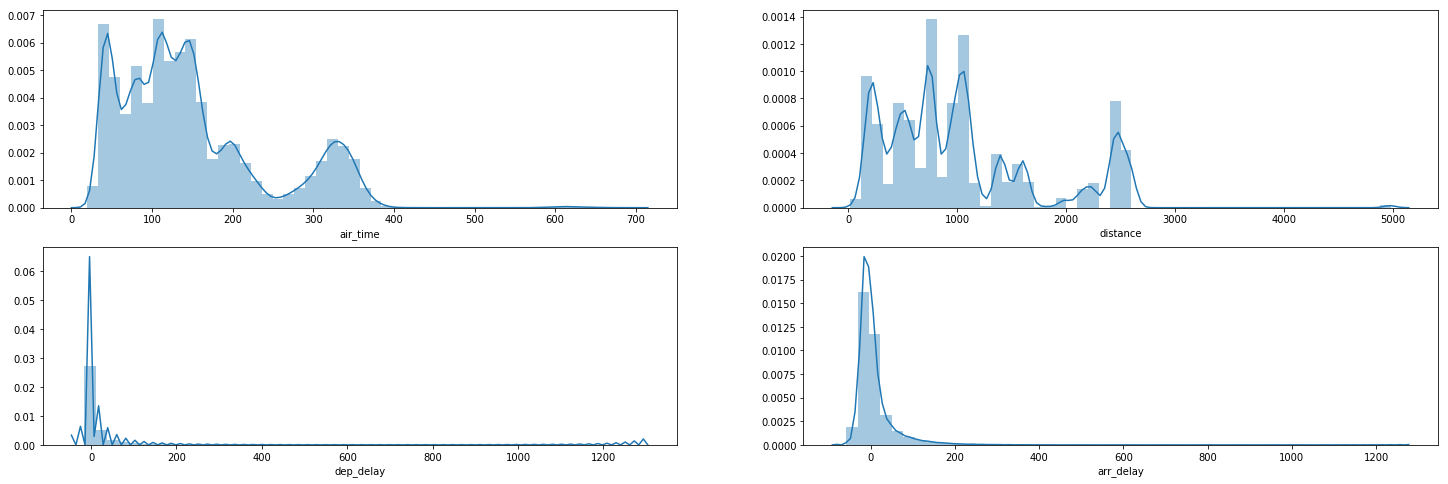

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(25,8))
sns.distplot((Flight_Data.air_time.astype(int)), ax = ax1)
sns.distplot(Flight_Data["distance"], ax = ax2)
sns.distplot(Flight_Data["dep_delay"], ax = ax3)
sns.distplot(Flight_Data["arr_delay"], ax = ax4)

#### Inferences:<BR>
1. air time, distance: There seems to be lot of randomness in the distribution of data. The distance data takes discrete values
2. Departure Delay: it takes a sudden peak calue between 0 - 20 mins and then tapers down. There are apparanet outliers in the dataset
3. Arrival Delay: It follows somewhat normal distribution with high kurtosis and +ve skewness

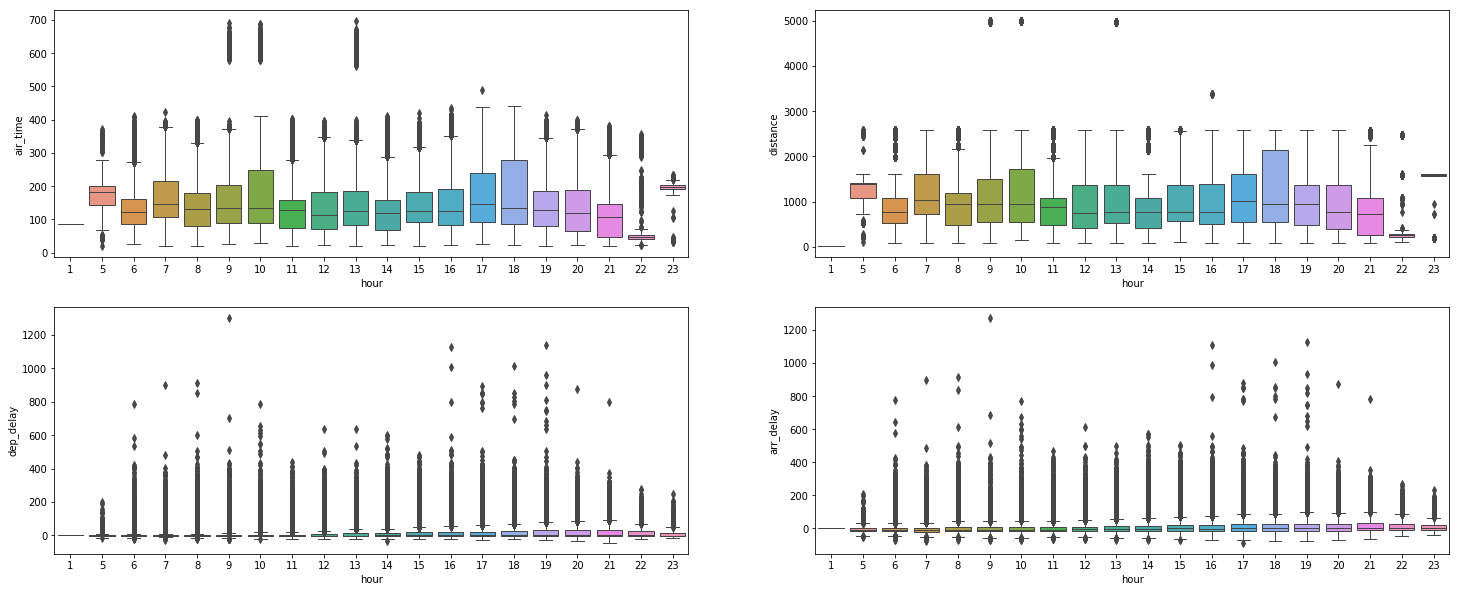

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(25,10))
sns.boxplot(x='hour', y='air_time', data=Flight_Data, linewidth=1, ax=ax1)
sns.boxplot(x='hour', y='distance', data=Flight_Data, linewidth=1, ax = ax2)
sns.boxplot(x='hour', y='dep_delay', data=Flight_Data, linewidth=1, ax = ax3)
sns.boxplot(x='hour', y='arr_delay', data=Flight_Data, linewidth=1, ax = ax4)

#### Inference
1. longer flight tend to be between 7 am to 10 am and again between 5 pm to 6 pm. 

### What is the concentration of Carriers at the origin airports?

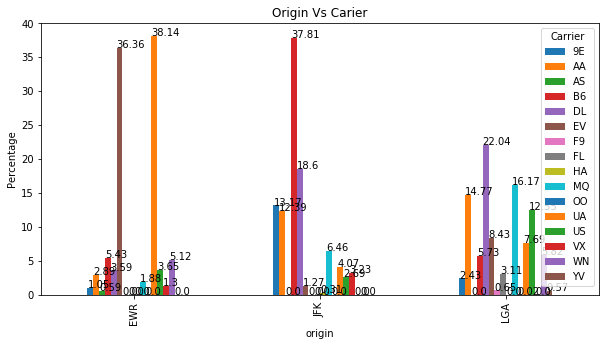

In [10]:
#You can normalise the data as percentage
destinationVsairline = round(pd.crosstab(Flight_Data['origin'], Flight_Data['carrier'], rownames=['origin'], \
                                      colnames=['Carrier'], normalize='index') * 100, 2)
ax = destinationVsairline.plot.bar(figsize=(10,5))
plt.title('Origin Vs Carier')
plt.ylabel("Percentage")
#for getting the values on each bar
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))


#### Inference
1. LGA seems to have much more equal distribution of carrier than EWR and JFK. Atleast 7 carrier have 5% share in total flights
2. JFK seem to have high number of B6 carrier(38%) and 4 other airlines have more than 5% share
3. EWR seem to have high concentration of 2 carrier - YV(36%) and UA(38%). It has over reliance on these2 carriers

### Let us understand the correlation of various columns of the dataset

In [11]:
corr_dataset = Flight_Data.drop('year', axis = 1).select_dtypes(include=[np.number])
corr_dataset.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,month,day,dep_delay,arr_delay,air_time,distance,hour,minute
month,1.0,0.0029,-0.02,-0.017,0.012,0.022,-0.0052,0.016
day,0.0029,1.0,0.00045,-0.00029,0.0021,0.003,-5.5e-05,0.00099
dep_delay,-0.02,0.00045,1.0,0.91,-0.023,-0.022,0.2,0.029
arr_delay,-0.017,-0.00029,0.91,1.0,-0.036,-0.063,0.17,0.022
air_time,0.012,0.0021,-0.023,-0.036,1.0,0.99,-0.021,0.018
distance,0.022,0.003,-0.022,-0.063,0.99,1.0,-0.019,0.02
hour,-0.0052,-5.5e-05,0.2,0.17,-0.021,-0.019,1.0,0.042
minute,0.016,0.00099,0.029,0.022,0.018,0.02,0.042,1.0


#### Inference
1. Arrival Delay and Departure Delay are +vely correlated
2. Distance and air time have high degree of correlation.

Arrival delay and distance need to be dropped for machine learning algorithm implementation

## Which airlines has fastest and slowest speed?

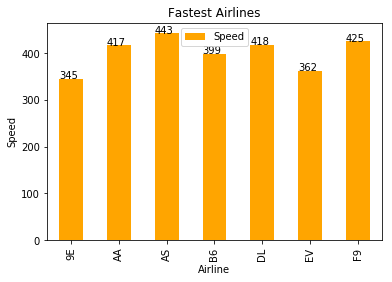

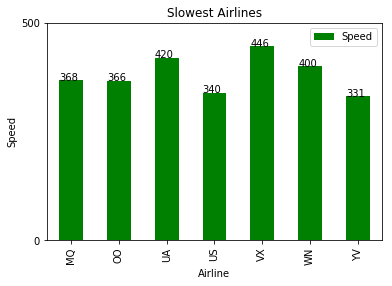

In [12]:
Flight_Data['Speed'] = (Flight_Data.distance * 60)/Flight_Data.air_time
mean_speed = Flight_Data[['carrier', 'Speed']].groupby('carrier').mean().astype(int)
ax = mean_speed.head(7).plot.bar(color = 'orange')
ax.set(xlabel="Airline", ylabel = "Speed", title = "Fastest Airlines")

for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))
    
ax = mean_speed.tail(7).plot.bar(color = 'green')
ax.set(xlabel="Airline", ylabel = "Speed", yticks = [0,500], title = "Slowest Airlines")

for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))
plt.show()

#### Inference:
1. AS airline is the fastest with 443 MPH of average speed. The next 6 fastest airlines are F9, DL, AA and B6 whose average speed is in the range of 399 to 425 MPH <br>
2. YV is the slowest airline with an average speed of 331 MPH.

## What is the pattern of delay of short, medium and long distance flights? 

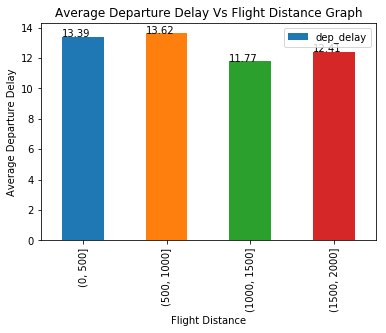

,distance_bin,dep_delay
0,"(0, 500]",13.39
1,"(500, 1000]",13.62
2,"(1000, 1500]",11.77
3,"(1500, 2000]",12.41


In [13]:
delay_short_med_long = Flight_Data[['flight_no', 'distance', 'dep_delay']]
# We devide the distance into 4 bins of 500 miles each
delay_short_med_long['distance_bin'] = pd.cut(Flight_Data.distance, [0, 500, 1000, 1500, 2000])
delay_short_med_long = round(delay_short_med_long.groupby('distance_bin').dep_delay.mean().reset_index(), 2)


ax = delay_short_med_long.plot.bar('distance_bin', 'dep_delay', linewidth = 5)
ax.set(xlabel = 'Flight Distance', ylabel = 'Average Departure Delay' , title = 'Average Departure Delay Vs Flight Distance Graph')
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))


plt.show()

delay_short_med_long

#### Inference
1. The departure delay of medium distance flights (1000 - 1500 miles) is the lowest (11.77 mins)
2. The departure delay of short distance flights (500 - 1000 miles) is the highest (13.62 mins)

## Which are the 5 best airlines in terms of arrival delays?

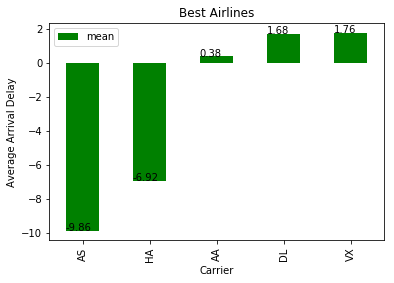

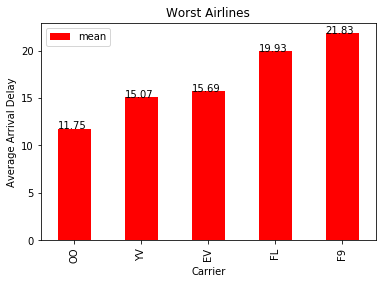

In [14]:
# Best airlines
avg_arrival_delay = round(Flight_Data.groupby('carrier')['arr_delay'].agg(['mean']), 2).sort_values('mean', ascending = True)
ax = avg_arrival_delay.head().plot(kind = 'bar', color = 'green')

ax.set(xlabel = 'Carrier', ylabel = 'Average Arrival Delay' , title = 'Best Airlines')
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))

ax = avg_arrival_delay.tail().plot(kind = 'bar', color = 'red')
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))
ax.set(xlabel = 'Carrier', ylabel = 'Average Arrival Delay' , title = 'Worst Airlines')
plt.show()

#### Inference:
1. AS is the best airline in terms of arrival delays. Infact, they are 9.9 minutes before estimated arrival time <br>
2. HA airline is the 2nd best with approx 6.9 minutes before expected arrival time <br>
3. All other airlines have +ve average arrival delays but AA, DL and VX are relatively better
4. F9 is the worst airline in terms of arrival delays followed by FL, EV and YV

## What is the average departure delay of each airline at Origin? 

In [15]:
#fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(25,10))
avg_dep_delay = Flight_Data.groupby(['origin','carrier'])['dep_delay'].mean().reset_index()
#avg_dep_delay.set_index('origin', inplace = True)
table2 = pd.pivot_table(avg_dep_delay, values = ('dep_delay'), index=['carrier'], columns = ['origin'], fill_value = 0, \
                        margins=True)

display(table2)

origin,EWR,JFK,LGA,All
carrier,,,,
9E,6.527603,18.833731,9.007084,11.456139
AA,10.062805,10.309729,6.734071,9.035535
AS,5.822129,0.000000,0.000000,5.822129
B6,13.083117,12.749976,14.763246,13.532113
DL,12.111469,8.343800,9.576928,10.010732
EV,20.075400,18.373580,18.935531,19.128170
F9,0.000000,0.000000,20.183942,20.183942
FL,0.000000,0.000000,18.615951,18.615951
HA,0.000000,4.900585,0.000000,4.900585


#### Inference
1. The above table shows average departure delay for each airline at the origin. This is will help travellers plan their travel plans 

## Which sectors are the most busy and which are least busy?

In [16]:
busiest_sectors = Flight_Data.groupby(['origin','dest']).size().reset_index().rename(columns={0:'No of Flights'}).\
        sort_values('No of Flights', ascending = False)

display("Busiest Sectors are:")
display(busiest_sectors.head(10))
display("Least Busy Sectors are:")
display(busiest_sectors.tail(10))

'Busiest Sectors are:'

,origin,dest,No of Flights
117,JFK,LAX,11262
156,LGA,ATL,10263
204,LGA,ORD,8857
146,JFK,SFO,8204
170,LGA,CLT,6168
55,EWR,ORD,6100
92,JFK,BOS,5898
197,LGA,MIA,5781
120,JFK,MCO,5464
7,EWR,BOS,5327


'Least Busy Sectors are:'

,origin,dest,No of Flights
1,EWR,ANC,8
215,LGA,SBN,6
71,EWR,SBN,4
202,LGA,MYR,3
114,JFK,JAC,2
152,JFK,STL,1
40,EWR,LGA,1
191,LGA,LEX,1
121,JFK,MEM,1
90,JFK,BHM,1


#### Inference
1. JFK - LAX and LGA - ATL are the two busiest sectors with more than 10,000 flight operating in each sector <br>
2. LGA - ORD, JFK - SFO, LGA - CLT and EWR - ORD are next businest sectors with flights operating between 8857 to 6100 respectively <br>
3. JFK - STL, JFK - LGA, LGA - LEX, JFK - MEM and JFK - BHM arethe least popular sectors with just 1 fight operating in the entire year <br>
4. Other least operating sectors are JFK - JAC, LGA - MYR, EWR - SBN, LGA - SBN and EWR - ANC with less that 10 flights

## Which month are have the least airline traffic?

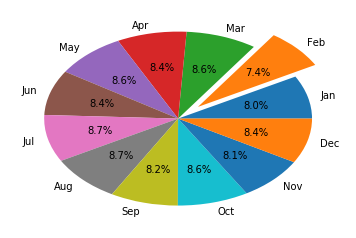

In [17]:
look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep',\
           10: 'Oct', 11: 'Nov', 12: 'Dec'}

monthly_traffic = Flight_Data.month.value_counts(sort = False).reset_index().rename(columns= {'index':'month', \
                                                                                              'month':'no_of_flights'})  
monthly_traffic['Cal_Month'] = monthly_traffic['month'].apply(lambda x: look_up[x])

plt.pie(monthly_traffic.no_of_flights, labels = monthly_traffic.Cal_Month, explode = (0,0.2,0,0,0,0,0,0,0,0,0,0), \
        autopct = '%1.1f%%')

plt.show()

#### Inference:
1. Feb is the most lean month in terms of air traffic. Thus any maintenance etc can be planned in this month
2. Airtraffic is evenly distributed in the remaining months with 8-9 percent in each month

## What is the hourly traffic of flights?

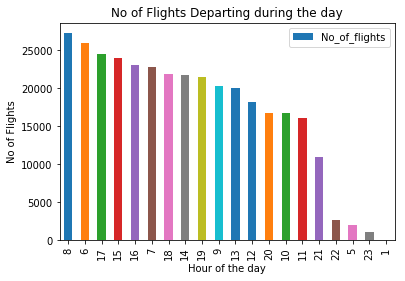

In [18]:
hourly_traffic = Flight_Data.hour.value_counts().reset_index().rename(columns={'index':'hour', 'hour': 'No_of_flights'})
plt.figure(figsize=(25,10))
ax = hourly_traffic.plot.bar(x = 'hour', y = 'No_of_flights', linewidth = 5)
ax.set(xlabel = 'Hour of the day', ylabel = 'No of Flights' , title = 'No of Flights Departing during the day')
plt.show()
#hourly_traffic

#### Inference
1. The peak time traffic is in the time zine 8:00-9:00, 6:00-7:00, 17:00-18:00, 15:00-16:00 and 16:00-17:00 region
2. There are no flights scheduled between 1:00-2:00<br>
3. Other lean period of the day are 23:00-24:00, 5:00-6:00 and 22:00-23:00. Any high priority maintenance can be planned in lean hours

## Which is the Best Airport for on-time departure?

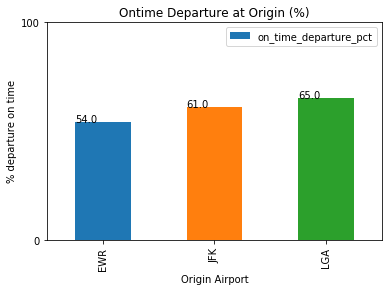

In [19]:
best_airports = Flight_Data.origin.value_counts().reset_index().rename(columns = {'index':'origin', 'origin':'total_flights'})
best_airports['on_time_departure'] = 0

for i in Flight_Data.origin.unique():
    ontime_departure = Flight_Data.loc[(Flight_Data.origin == i) & (Flight_Data.dep_delay <= 0)].origin.count()
    best_airports.loc[best_airports['origin'] == i, 'on_time_departure'] = ontime_departure
    
best_airports['on_time_departure_pct'] = round(best_airports['on_time_departure']/best_airports['total_flights'] * 100, 0)
ax = best_airports.plot.bar(x = 'origin', y = 'on_time_departure_pct', linewidth = 2,yticks = [0,100])
#for getting the values on each bar
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))
ax.set(xlabel = 'Origin Airport', ylabel = '% departure on time', title = 'Ontime Departure at Origin (%)')
plt.show()


#### Inference
1. LGA is the best ontime departure airport with a score of 65%

## Which are the best airports for on-time arrival of flights?
For this analysis, we shall consider only those airports where no of flights > 100. The reason being, there are airports which have less than 10 flights in a year. Thus we shall ignore airports that are very sparingly used

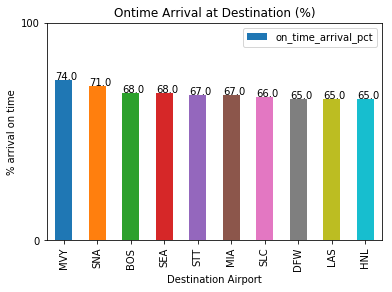

In [20]:
best_airports = Flight_Data.groupby(['dest']).size().reset_index().rename(columns={0:'total_flights'})
best_airports.index = best_airports.dest
best_airports['on_time_arrival'] = 0
for i in Flight_Data.dest.unique():
    ontime_arrival = Flight_Data.loc[(Flight_Data.dest == i) & (Flight_Data.arr_delay <= 0)].origin.count()
    best_airports.loc[i, 'on_time_arrival'] = ontime_arrival
best_airports['on_time_arrival_pct'] = round(best_airports['on_time_arrival']/best_airports['total_flights'] * 100, 0)


best_airports = best_airports.loc[best_airports.total_flights > 100].sort_values(by = 'on_time_arrival_pct', \
                                                                                 ascending = False).head(10)
ax = best_airports.plot.bar(x = 'dest', y = 'on_time_arrival_pct', linewidth = 2,yticks = [0,100])
ax.set(xlabel = 'Destination Airport', ylabel = '% arrival on time', title = 'Ontime Arrival at Destination (%)')
#for getting the values on each bar
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))
plt.show()

#### Inference
1. MVY and SNA leads from other airports in terms of on time arrival with a 69% on-time flights<br>
2. However, there is not significant gap between the next 5-6 airports(SEA, MIA, STT, BOS, DFW, SLC, HNL, LAS) which range between 64% to 67%

## Which route has the most amount of delay?

In [21]:
delayed_flights = Flight_Data.loc[Flight_Data.dep_delay > 0][['month', 'day', 'departure_time', 'dep_delay', 'arrival_time', 'arr_delay',\
                                                              'carrier', 'origin', 'dest', 'air_time', 'distance', 'flight_no']]
most_delayed_route = delayed_flights.groupby(['origin', 'dest']).size().reset_index().rename(columns={0:'No_of_delayed_flights'}).\
        sort_values('No_of_delayed_flights', ascending = False)
most_delayed_route['delay %'] = round(most_delayed_route['No_of_delayed_flights']/most_delayed_route['No_of_delayed_flights'].\
                                      sum() * 100, 2)
print('Most delayed routs are:')
most_delayed_route.head(10)


Most delayed routs are:


,origin,dest,No_of_delayed_flights,delay %
117,JFK,LAX,4150,3.04
156,LGA,ATL,3692,2.71
146,JFK,SFO,3120,2.29
203,LGA,ORD,3076,2.25
55,EWR,ORD,2789,2.04
74,EWR,SFO,2682,1.97
39,EWR,LAX,2428,1.78
7,EWR,BOS,2225,1.63
42,EWR,MCO,2194,1.61
92,JFK,BOS,2193,1.61


#### Inferences
1. JFK LAX sector has maximum number of delayed flights (4105) which account for 3.04% of all the flights that aredelayed
2. LGA ATL, JFK SFO, LGA ORD and EWR ORD, each of these sectors have very high number of delayed flights and each of them account for more than 2% of overall delayed flights

### Which flights are delayed by more than 30 minutes?

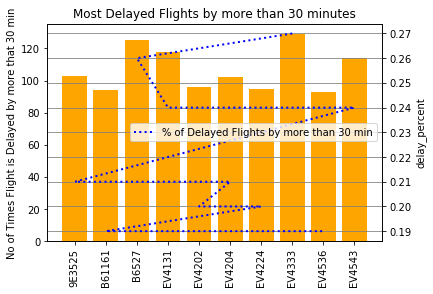

In [22]:
delayed_flights_30 = Flight_Data.loc[Flight_Data.dep_delay > 30][['month', 'day', 'departure_time', 'dep_delay', 'arrival_time',\
                                                'arr_delay', 'carrier', 'origin', 'dest', 'air_time', 'distance', 'flight_no']]
delayed_flights_30 = delayed_flights_30.groupby(['flight_no']).size().reset_index().rename(columns={0:'No_of_delayed_flights'}).\
        sort_values('No_of_delayed_flights', ascending = False)
delayed_flights_30['delay_percent'] = round(delayed_flights_30['No_of_delayed_flights']/delayed_flights_30['No_of_delayed_flights'].\
                                      sum() * 100, 2)


plt.figure(figsize=(20,10))
plt.subplots_adjust()

fig, ax1 = plt.subplots()
plt.xticks()

#display(delayed_flights_30.flight_no.head(10), delayed_flights_30.No_of_delayed_flights.head(10).head(10))
curve1 = ax1.bar(delayed_flights_30.flight_no.head(10), delayed_flights_30.No_of_delayed_flights.head(10), \
         label = "No of Delayed Flights by more than 30 min", linewidth = 2, color = 'orange')
ax1.set_ylabel("No of Times Flight is Delayed by more that 30 min")

ax1.tick_params('x', rotation = 90)

ax2 = ax1.twinx()

curve2 = ax2.plot(delayed_flights_30.flight_no.head(10), delayed_flights_30.delay_percent.head(10), \
                  label = "% of Delayed Flights by more than 30 min", linestyle = 'dotted', linewidth = 2, color = 'b')
ax2.set_ylabel("delay_percent")


plt.title("Most Delayed Flights by more than 30 minutes")

plt.legend()
plt.grid(True, color='grey')
plt.show()

#### Inferences
1. Flight No B6527 has highest percentage of delays(>30 mins) followed by flight no EV4131

## On average how do delays of flights vary over the day?

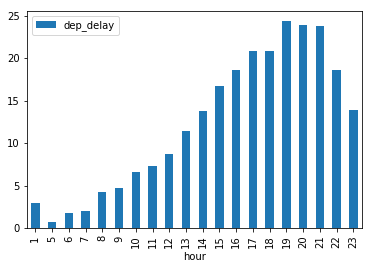

In [23]:
hourly_traffic = Flight_Data[['hour', 'dep_delay']].groupby('hour').mean().plot.bar()

#### Inference
1. The departure delay tend to be longer as the day progresses. They peak during 17:00 - 22:00 hours to more than 17 minutes
2. Morning flights (6 am to 9 am) have east amount of departure delayes(2-5 minutes)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015D221D0>,
      dtype=object)

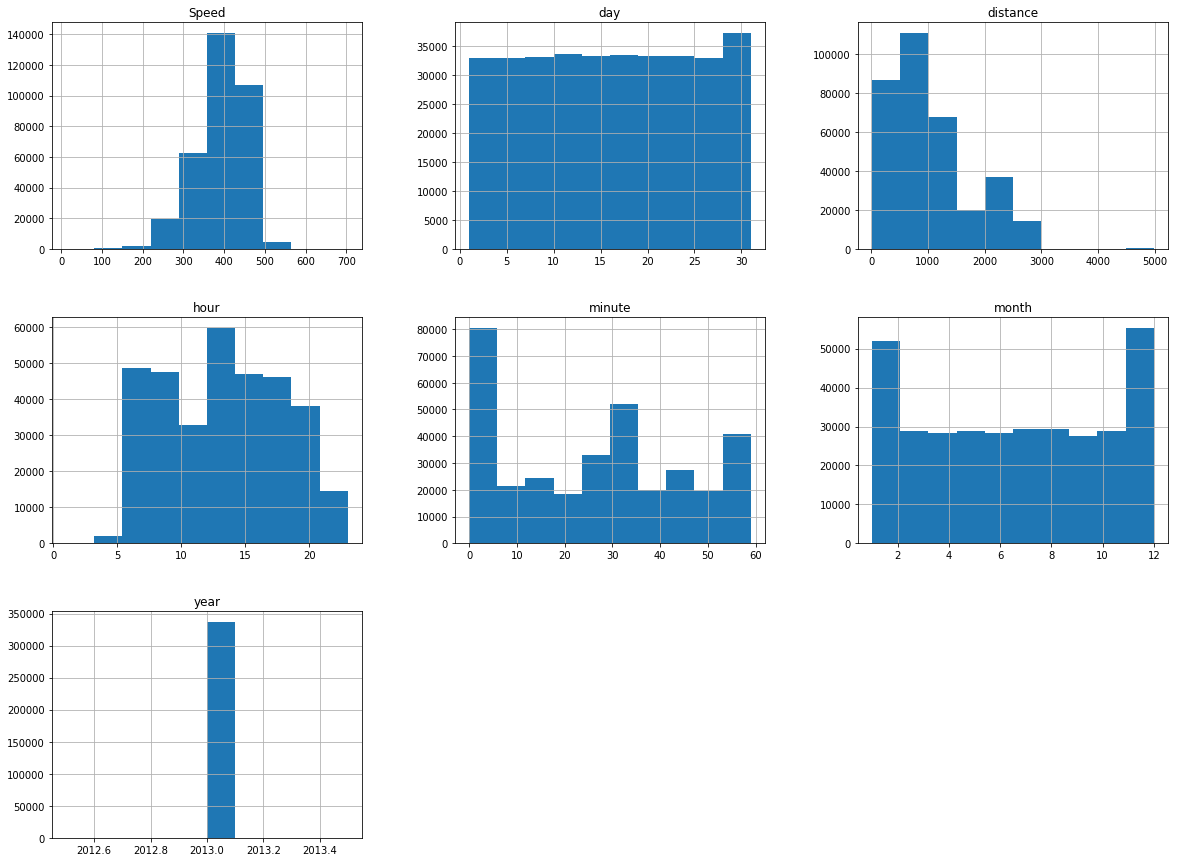

In [24]:
Flight_Data[Flight_Data.dtypes[(Flight_Data.dtypes=="float64")|(Flight_Data.dtypes=="int64")]
                        .index.values].hist(figsize=[20,15])

#### Inferences
1. Maximum delayes happens between 3 pm to 6 pm
2. Evenings (6 pm to 9 pm) also have very high chances of flight delays 
3. Morning flights have relatively low departure delay

In [25]:
# Output the Dataframe into a CSV file
Flight_Data.to_csv('dataset/Flight_Data_EDA.csv',  index = False)